In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Untuk Google Colab :
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file = '/content/drive/MyDrive/GoogleColab/cust_seg.csv'
df = pd.read_csv(file)

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/GoogleColab/cust_seg.csv'
df = pd.read_csv(file_path)
print(df.head())

   custid  sex  AqChannel  region  Marital_status  segment  pre_usage  \
0      70    0          4       1               1        1         57   
1     121    1          4       2               1        3         68   
2      86    0          4       3               1        1         44   
3     141    0          4       3               1        3         63   
4     172    0          4       2               1        2         47   

   Post_usage_1month  Latest_mon_usage  post_usage_2ndmonth  
0                 52              49.2                 57.2  
1                 59              63.6                 64.9  
2                 33              64.8                 36.3  
3                 44              56.4                 48.4  
4                 52              68.4                 57.2  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [7]:
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


In [8]:
print(df.isnull().sum())

custid                 0
sex                    0
AqChannel              0
region                 0
Marital_status         0
segment                0
pre_usage              0
Post_usage_1month      0
Latest_mon_usage       0
post_usage_2ndmonth    0
dtype: int64


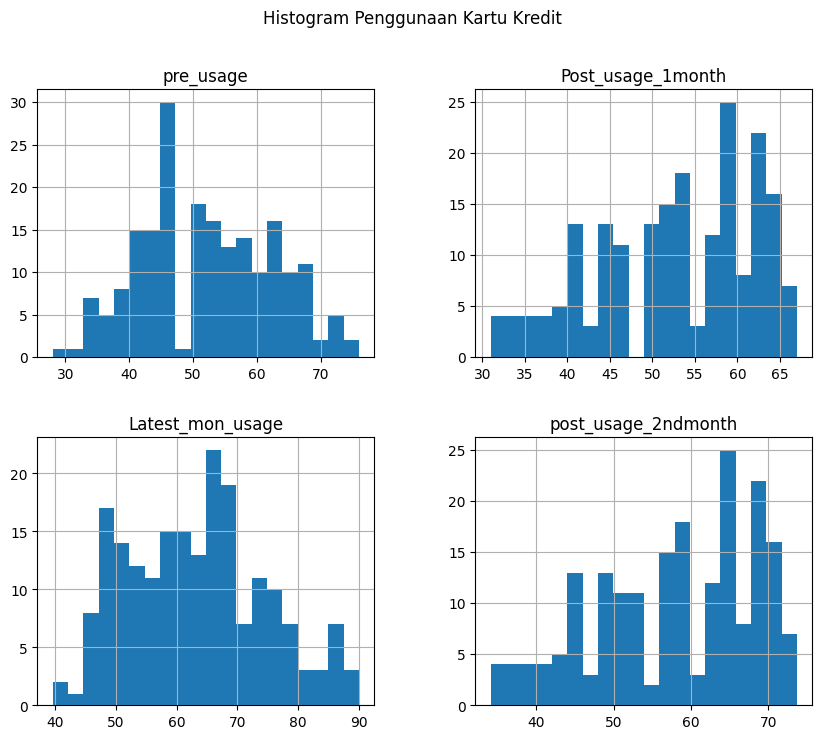

In [10]:
#no.1b
df[['pre_usage', 'Post_usage_1month', 'Latest_mon_usage', 'post_usage_2ndmonth']].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histogram Penggunaan Kartu Kredit")
plt.show()

In [12]:
#no.2 a
#Hipotesis:

#𝐻0 : Tidak ada perbedaan signifikan dalam penggunaan kartu kredit sebelum dan satu bulan setelah kampanye.
#𝐻1 : Ada perbedaan signifikan dalam penggunaan kartu kredit sebelum dan satu bulan setelah kampanye.

from scipy.stats import ttest_rel


t_stat, p_value = ttest_rel(df['pre_usage'], df['Post_usage_1month'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Kesimpulan
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada perbedaan signifikan antara penggunaan sebelum dan 1 bulan setelah kampanye.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara penggunaan sebelum dan 1 bulan setelah kampanye.")


t-statistic: -0.8673065458794775
p-value: 0.3868186820914985
Gagal tolak H0: Tidak ada perbedaan signifikan antara penggunaan sebelum dan 1 bulan setelah kampanye.


In [13]:
#no.2 b
#Hipotesisi:
#H0 : Tidak ada perbedaan signifikan dalam penggunaan kartu kredit sebelum dan dua bulan setelah kampanye
#H1 : Ada perbedaan signifikan dalam penggunakaan kartu kredit sebelum dan dua bulan setelah kampanye


t_stat, p_value = ttest_rel(df['pre_usage'], df['post_usage_2ndmonth'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

#Kesimpulan
if p_value < alpha:
    print("Tolak H0: Ada perbedaan signifikan antara penggunaan sebelum dan 2 bulan setelah kampanye.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara penggunaan sebelum dan 2 bulan setelah kampanye.")


t-statistic: -8.866832246938742
p-value: 4.295733828012836e-16
Tolak H0: Ada perbedaan signifikan antara penggunaan sebelum dan 2 bulan setelah kampanye.


In [14]:
#no.3 a
#Hipotesis :
#H0 : Tidak ada perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan satu bulan setelah kampanye
#H1 : Ada perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan satu bulan setelah kampanye

from scipy.stats import ttest_ind

male_usage_1month = df[df['sex'] == 0] ['Post_usage_1month']
female_usage_1month = df[df['sex'] == 1] ['Post_usage_1month']

t_stat, p_value = ttest_ind(male_usage_1month, female_usage_1month)
print("t-statistic:", t_stat)
print("p-value:", p_value)

#Kesimpulan
if p_value < alpha:
    print("Tolak H0: Ada perbedaan signifikan antara penggunaan laki-laki dan perempuan satu bulan setelah kampanye.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara penggunaan laki-laki dan perempuan satu bulan setelah kampanye.")

t-statistic: -3.7340738531536797
p-value: 0.00024625461203549315
Tolak H0: Ada perbedaan signifikan antara penggunaan laki-laki dan perempuan satu bulan setelah kampanye.


In [15]:
#no.3 b
#Hipotesis:

#𝐻0 : Tidak ada perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan dua bulan setelah kampanye.
#𝐻1 : Ada perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan dua bulan setelah kampanye

# Mengelompokkan data untuk penggunaan dua bulan setelah kampanye
male_usage_2month = df[df['sex'] == 0]['post_usage_2ndmonth']
female_usage_2month = df[df['sex'] == 1]['post_usage_2ndmonth']

# Uji hipotesis independent t-test
t_stat, p_value = ttest_ind(male_usage_2month, female_usage_2month)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Kesimpulan
if p_value < alpha:
    print("Tolak H0: Ada perbedaan signifikan antara penggunaan laki-laki dan perempuan 2 bulan setelah kampanye.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara penggunaan laki-laki dan perempuan 2 bulan setelah kampanye.")


t-statistic: -3.7340738531536926
p-value: 0.00024625461203548154
Tolak H0: Ada perbedaan signifikan antara penggunaan laki-laki dan perempuan 2 bulan setelah kampanye.
